In [10]:
import sys
sys.path.append("..") # Adds higher directory to python modules path.

import matplotlib.pyplot as plt
import matplotlib
import numpy as np
from models.Loader import load_model
from utils.shap_tools import ChronoSHAP
from models.Wrappers import Reduced_io_autoformer_wrapper
from torch.autograd import Variable
from cycler import cycler

# import argparse
import os
import torch
# import copy
# from exp.exp_main import Exp_Main
# import random
import numpy as np

import shap
import pickle
import warnings

from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error


%matplotlib qt5 
# %matplotlib widget
%matplotlib inline

warnings.filterwarnings('ignore', message='.*unrecognized nn.Module: LayerNorm.*')
plt.rcParams["font.family"] = "Times New Roman"

In [58]:
import pandas as pd 

data_path = "dataset/"
datasets = dict()

# data_files = os.listdir(data_path)
# data_files.remove("all_six_datasets.zip")
# print(len(data_files))

dataset_key = "ETTh1"
# for f in ["electricity.csv", "ETTh1.csv", "ETTh2.csv", "ETTm1.csv", "ETTm2.csv", "exchange_rate.csv", "national_illness.csv", "traffic.csv", "weather.csv"]:
for f in ["{}.csv".format(dataset_key)]:
    print(f.replace(".csv",""))        
    dataset = pd.read_csv(data_path+f)
#     display(dataset.describe())
    datasets[f.replace(".csv","")] = dataset

ETTh1


date     object
HUFL    float64
HULL    float64
MUFL    float64
MULL    float64
LUFL    float64
LULL    float64
OT      float64
dtype: object


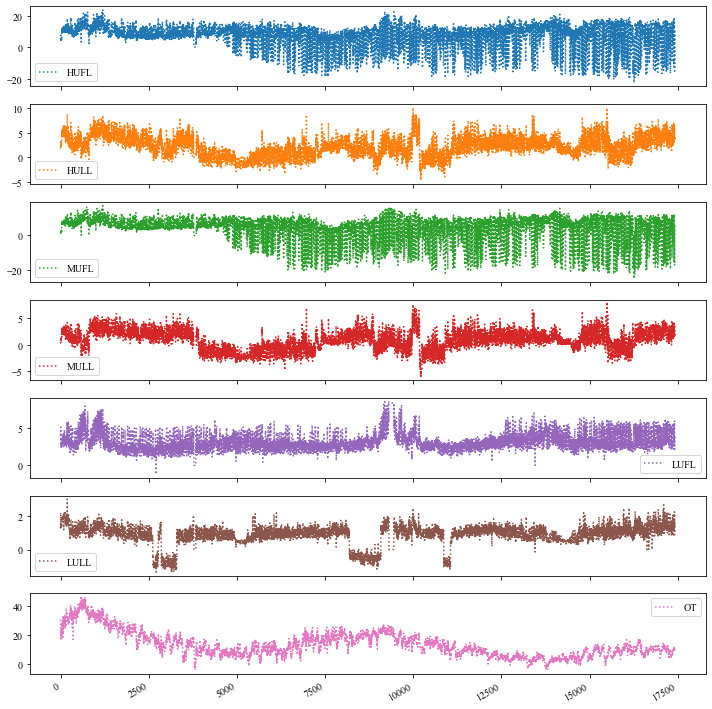

In [59]:
dset = datasets[dataset_key]
print(dset.dtypes)

# %matplotlib inline 
datasets[dataset_key].plot(subplots=True, figsize=(10, 10))
plt.tight_layout()
plt.show()

# dset = datasets["exchange_rate"].loc[:, datasets["exchange_rate"].columns != 'date']

Arg use_gpu initial: True
Args in experiment:
Namespace(activation='gelu', batch_size=32, c_out=7, checkpoints='F:\\Transformers old results\\checkpoints', d_ff=2048, d_layers=1, d_model=512, data='custom', data_path='national_illness.csv', dec_in=7, des='Exp', devices='0,1,2,3', distil=True, do_predict=False, dropout=0.05, e_layers=2, embed='timeF', embed_type=0, enc_in=7, factor=3, features='M', freq='h', gpu=0, individual=False, is_training=1, itr=1, label_len=18, learning_rate=0.0001, loss='mse', lradj='type1', model='Autoformer', model_id='ili_36', moving_avg=25, n_heads=8, num_workers=0, output_attention=False, patience=3, pred_len=36, root_path='./dataset/', save_pred_values=False, seed=32598, seq_len=36, target='OT', test_flop=False, train_epochs=10, train_only=False, use_amp=False, use_gpu=True, use_multi_gpu=False)
Use GPU: cuda:0
F:\Transformers old results\checkpoints/ili_36_Autoformer_custom_ftM_sl36_ll18_pl36_dm512_nh8_el2_dl1_df2048_fc3_ebtimeF_dtTrue_Exp_0_seed32598/che

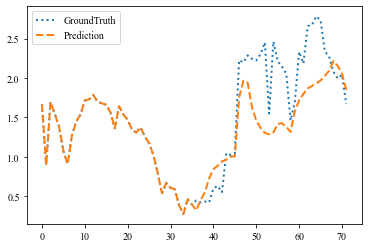

In [60]:
#       "--checkpoints", "F:\Transformers old results\checkpoints",
#       "--seed", "10458", \

model_args = {}

exch_model_args = [
    "--is_training", "1", \
    "--seed", "15726", \
    "--num_workers", "0", \
    "--root_path", "./dataset/", \
    "--data_path", "{}.csv".format("exchange_rate"), \
    "--model_id", "{}_96".format("exchange"), \
    "--model", "Autoformer", \
    "--data", "custom", \
    "--features", "M", \
    "--seq_len", "96", \
    "--label_len", "48", \
    "--pred_len", "96", \
    "--e_layers", "2", \
    "--d_layers", "1", \
    "--factor", "3", \
    "--enc_in", "8", \
    "--dec_in", "8", \
    "--c_out", "8", \
    "--des", 'Exp', \
    "--itr", "1", \
    "--checkpoints", "F:\Transformers old results\checkpoints"]
model_args["exchange_rate"] = exch_model_args

etth1_model_args = [
    "--is_training", "1", \
    "--seed", "10458", \
    "--num_workers", "0", \
    "--root_path", "./dataset/", \
    "--data_path", "{}.csv".format("ETTh1"), \
    "--model_id", "{}_96".format("ETTh1"), \
    "--model", "Autoformer", \
    "--data", "{}".format("ETTh1"), \
    "--features", "M", \
    "--seq_len", "96", \
    "--label_len", "48", \
    "--pred_len", "96", \
    "--e_layers", "2", \
    "--d_layers", "1", \
    "--factor", "3", \
    "--enc_in", "7", \
    "--dec_in", "7", \
    "--c_out", "7", \
    "--des", 'Exp', \
    "--itr", "1", \
    "--checkpoints", "F:\Transformers old results\checkpoints"]
model_args["ETTh1"] = etth1_model_args

etth2_model_args = [
    "--is_training", "1", \
    "--seed", "25565", \
    "--num_workers", "0", \
    "--root_path", "./dataset/", \
    "--data_path", "{}.csv".format("ETTh2"), \
    "--model_id", "{}_96".format("ETTh2"), \
    "--model", "Autoformer", \
    "--data", "{}".format("ETTh2"), \
    "--features", "M", \
    "--seq_len", "96", \
    "--label_len", "48", \
    "--pred_len", "96", \
    "--e_layers", "2", \
    "--d_layers", "1", \
    "--factor", "3", \
    "--enc_in", "7", \
    "--dec_in", "7", \
    "--c_out", "7", \
    "--des", 'Exp', \
    "--itr", "1", \
    "--checkpoints", "F:\Transformers old results\checkpoints"]
model_args["ETTh2"] = etth2_model_args

ettm1_model_args = [
    "--is_training", "1", \
    "--seed", "10458", \
    "--num_workers", "0", \
    "--root_path", "./dataset/", \
    "--data_path", "{}.csv".format("ETTm1"), \
    "--model_id", "{}_96".format("ETTm1"), \
    "--model", "Autoformer", \
    "--data", "{}".format("ETTm1"), \
    "--features", "M", \
    "--seq_len", "96", \
    "--label_len", "48", \
    "--pred_len", "96", \
    "--e_layers", "2", \
    "--d_layers", "1", \
    "--factor", "3", \
    "--enc_in", "7", \
    "--dec_in", "7", \
    "--c_out", "7", \
    "--des", 'Exp', \
    "--itr", "1", \
    "--checkpoints", "F:\Transformers old results\checkpoints"]
model_args["ETTm1"] = ettm1_model_args

ettm2_model_args = [
    "--is_training", "1", \
    "--seed", "3293", \
    "--num_workers", "0", \
    "--root_path", "./dataset/", \
    "--data_path", "{}.csv".format("ETTm2"), \
    "--model_id", "{}_96".format("ETTm2"), \
    "--model", "Autoformer", \
    "--data", "{}".format("ETTm2"), \
    "--features", "M", \
    "--seq_len", "96", \
    "--label_len", "48", \
    "--pred_len", "96", \
    "--e_layers", "2", \
    "--d_layers", "1", \
    "--factor", "3", \
    "--enc_in", "7", \
    "--dec_in", "7", \
    "--c_out", "7", \
    "--des", 'Exp', \
    "--itr", "1", \
    "--checkpoints", "F:\Transformers old results\checkpoints"]
model_args["ETTm2"] = ettm2_model_args


weather_model_args = [
    "--is_training", "1", \
    "--seed", "28649", \
    "--num_workers", "0", \
    "--root_path", "./dataset/", \
    "--data_path", "{}.csv".format("weather"), \
    "--model_id", "{}_96".format("weather"), \
    "--model", "Autoformer", \
    "--data", "custom", \
    "--features", "M", \
    "--seq_len", "96", \
    "--label_len", "48", \
    "--pred_len", "96", \
    "--e_layers", "2", \
    "--d_layers", "1", \
    "--factor", "3", \
    "--enc_in", "21", \
    "--dec_in", "21", \
    "--c_out", "21", \
    "--des", 'Exp', \
    "--itr", "1", \
    "--checkpoints", "F:\Transformers old results\checkpoints"]
model_args["weather"] = weather_model_args


ili_model_args = [
    "--is_training", "1", \
    "--seed", "32598", \
    "--num_workers", "0", \
    "--root_path", "./dataset/", \
    "--data_path", "{}.csv".format("national_illness"), \
    "--model_id", "{}_36".format("ili"), \
    "--model", "Autoformer", \
    "--data", "custom", \
    "--features", "M", \
    "--seq_len", "36", \
    "--label_len", "18", \
    "--pred_len", "36", \
    "--e_layers", "2", \
    "--d_layers", "1", \
    "--factor", "3", \
    "--enc_in", "7", \
    "--dec_in", "7", \
    "--c_out", "7", \
    "--des", 'Exp', \
    "--itr", "1", \
    "--checkpoints", "F:\Transformers old results\checkpoints"]
model_args["national_illness"] = ili_model_args

dataset_key = "national_illness"

exp, model, setting = load_model(model_args[dataset_key], load=True, return_copy=False)

model.eval()
# model_no_train.eval()

# print("Testing trained model")
exp.test(setting)
# print("Testing untrained model")
# exp_no_train.test(setting_no_train)

# display(model)

# Prepare inputs of the model

In [61]:
train_data, train_loader = exp._get_data("train")
for i, (batch_x_train_b, batch_y_train_b, batch_x_mark_train_b, batch_y_mark_train_b) in enumerate(train_loader):
#     print("i={}, Shapes of batch_x: {}, batch_x_mark: {}, batch_y: {}, batch_y_mark: {}".format(i, batch_x_train_b.shape, batch_x_mark_train_b.shape, batch_y_train_b.shape, batch_y_mark_train_b.shape))
    if (i==0):
        batch_x_train = torch.cat((batch_x_train_b,))
        batch_y_train = torch.cat((batch_y_train_b,))
        batch_x_mark_train = torch.cat((batch_x_mark_train_b,))
        batch_y_mark_train = torch.cat((batch_y_mark_train_b,))
    else:
        batch_x_train = torch.cat((batch_x_train, batch_x_train_b))
        batch_y_train = torch.cat((batch_y_train, batch_y_train_b))
        batch_x_mark_train = torch.cat((batch_x_mark_train, batch_x_mark_train_b))
        batch_y_mark_train = torch.cat((batch_y_mark_train, batch_y_mark_train_b))

batch_x_train = batch_x_train.float().to(next(model.parameters()).device)
batch_y_train = batch_y_train.float().to(next(model.parameters()).device)
batch_x_mark_train = batch_x_mark_train.float().to(next(model.parameters()).device)
batch_y_mark_train = batch_y_mark_train.float().to(next(model.parameters()).device)

# dec_inp_train = torch.zeros_like(batch_y_train[:, -train_data.pred_len:, :]).float()
# dec_inp_train = torch.cat([batch_y_train[:, :train_data.label_len, :], dec_inp_train], dim=1).float().to(next(model.parameters()).device)

dec_inp_train = torch.zeros([batch_y_train.shape[0], train_data.pred_len, batch_y_train.shape[2]]).float().to(batch_y_train.device)
dec_inp_train = torch.cat([batch_y_train[:, :train_data.label_len, :], dec_inp_train], dim=1).float().to(next(model.parameters()).device)

print("Model input shapes: batch_x: {}, batch_x_mark: {}, dec_inp: {}, batch_y_mark: {}".format(batch_x_train.shape, batch_x_mark_train.shape, dec_inp_train.shape, batch_y_mark_train.shape))

train 605
Model input shapes: batch_x: torch.Size([576, 36, 7]), batch_x_mark: torch.Size([576, 36, 4]), dec_inp: torch.Size([576, 54, 7]), batch_y_mark: torch.Size([576, 54, 4])


In [62]:
pred_data, pred_loader = exp._get_data("pred")

for i, (batch_x, batch_y, batch_x_mark, batch_y_mark) in enumerate(pred_loader):
    print("Shapes of batch_x: {}, batch_x_mark: {}, batch_y: {}, batch_y_mark: {}".format(batch_x.shape, batch_x_mark.shape, batch_y.shape, batch_y_mark.shape))
#     print("batch_x: ",batch_x[0,:,0])
#     print("batch_y: ",batch_y[0,:,0])
    print()

batch_x = batch_x.float().to(next(model.parameters()).device)
batch_y = batch_y.float().to(next(model.parameters()).device)
batch_x_mark = batch_x_mark.float().to(next(model.parameters()).device)
batch_y_mark = batch_y_mark.float().to(next(model.parameters()).device)

dec_inp = torch.zeros([batch_y.shape[0], pred_data.pred_len, batch_y.shape[2]]).float().to(batch_y.device)
dec_inp = torch.cat([batch_y[:, :pred_data.label_len, :], dec_inp], dim=1).float().to(next(model.parameters()).device)

print("Model input shapes: batch_x: {}, batch_x_mark: {}, dec_inp: {}, batch_y_mark: {}".format(batch_x.shape, batch_x_mark.shape, dec_inp.shape, batch_y_mark.shape))

pred 1
Shapes of batch_x: torch.Size([1, 36, 7]), batch_x_mark: torch.Size([1, 36, 4]), batch_y: torch.Size([1, 18, 7]), batch_y_mark: torch.Size([1, 54, 4])

Model input shapes: batch_x: torch.Size([1, 36, 7]), batch_x_mark: torch.Size([1, 36, 4]), dec_inp: torch.Size([1, 54, 7]), batch_y_mark: torch.Size([1, 54, 4])


# Reduced inputs and outputs model

In [63]:
device = torch.device('cpu')

# Create list to identify feature and position in the input sequence
feature_list = []
for i in range(exp.args.c_out*exp.args.seq_len):
    feature_list.append("Feature {}, seq pos {} ".format(pred_data.cols[1:][i%exp.args.c_out], int(i/exp.args.c_out)))

## DeepSHAP explainer (based on DeepLift)

### For whole training set

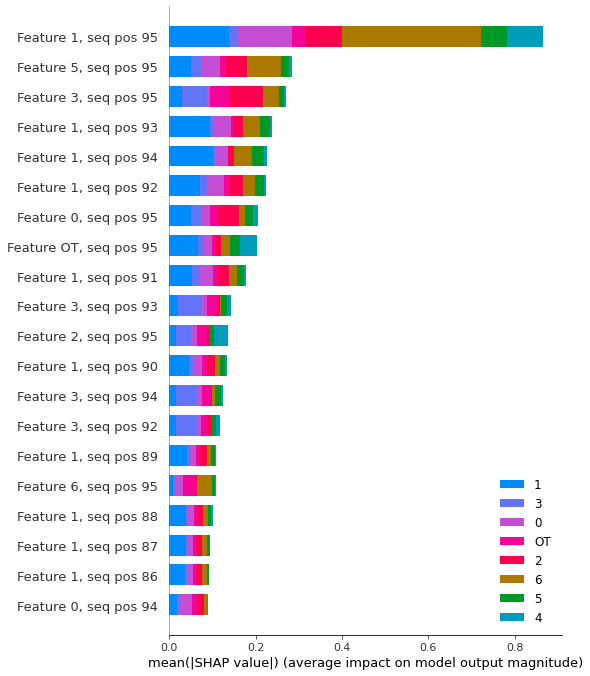

In [19]:
# Get a subset of the train data
batch_x_train_sub = batch_x_train[::50,:,:]

# Flatten X to be fed to the model
reduced_new_input = batch_x.flatten(start_dim=1).to(device)
reduced_new_input_train = batch_x_train_sub.flatten(start_dim=1).to(device)

# X converted to numpy for SHAP masker
reduced_new_input_train_np = reduced_new_input_train.cpu().detach().numpy()
reduced_new_input_np = reduced_new_input.cpu().detach().numpy()

# Define global variables for the wrapper to use
global_batch_x_mark = batch_x_mark.to(device)
global_batch_y_mark = batch_y_mark.to(device)
pred_hor_explained = 0

reduced_io_wrapped_model = Reduced_io_transformer_wrapper(exp.args, global_batch_x_mark, 
                                                          global_batch_y_mark, device, 
                                                          pred_hor_explained).float()
reduced_io_wrapped_model.load_state_dict(model.state_dict())
reduced_io_wrapped_model.eval()

# Set common device
# device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device = torch.device('cpu')
exp.device = device
reduced_io_wrapped_model.to(device)

torch.set_grad_enabled(True)

e = shap.DeepExplainer(reduced_io_wrapped_model, reduced_new_input_train)
reduced_io_deep_shap_values = e.shap_values(reduced_new_input)
shap.summary_plot(reduced_io_deep_shap_values, reduced_new_input, feature_names=feature_list, class_names=pred_data.cols[1:][:])

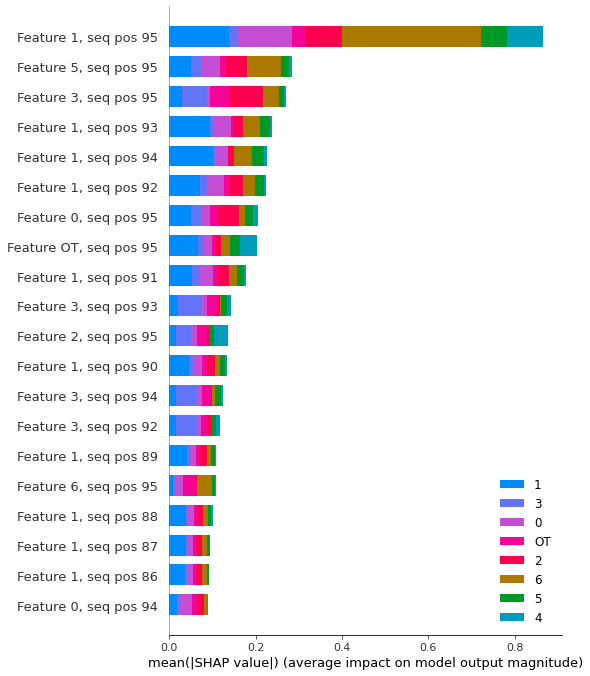

In [20]:
shap.summary_plot(reduced_io_deep_shap_values, reduced_new_input, feature_names=feature_list, class_names=pred_data.cols[1:][:])

### Deep SHAP for full time horizon

In [37]:
num_train_samples = 50

if dataset_key == "national_illness":
    num_train_samples = batch_x_train.shape[0]

# Get a subset of the train data
batch_x_train_sub = batch_x_train[::round(batch_x_train.shape[0]/num_train_samples+0.5),:,:]

device = torch.device('cuda')

# Flatten X to be fed to the model
reduced_new_input = batch_x.flatten(start_dim=1).to(device)
reduced_new_input_train = batch_x_train_sub.flatten(start_dim=1).to(device)

# X converted to numpy for SHAP masker
reduced_new_input_train_np = reduced_new_input_train.cpu().detach().numpy()
reduced_new_input_np = reduced_new_input.cpu().detach().numpy()

# Define global variables for the wrapper to use
global_batch_x_mark = batch_x_mark.to(device)
global_batch_y_mark = batch_y_mark.to(device)
pred_hor_explained = 0
exp.device = device

reduced_io_wrapped_model = Reduced_io_autoformer_wrapper(exp.args, global_batch_x_mark, 
                                                          global_batch_y_mark, device, 
                                                          pred_hor_explained).float()
model.to(device)
reduced_io_wrapped_model.load_state_dict(model.state_dict())
reduced_io_wrapped_model.eval()

# Set common device
# device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
reduced_io_wrapped_model.to(device)
reduced_new_input_train.to(device)

torch.set_grad_enabled(True)

e = shap.DeepExplainer(reduced_io_wrapped_model, reduced_new_input_train)

# Each explained prediction horizon has to be analyzed individually to make it work with SHAP, so we store them in a list
# reduced_deep_shap_values = []

# for pred_hor in range(reduced_io_wrapped_model.pred_len):
#     print("Analyzing time step ",pred_hor)
#     reduced_io_wrapped_model.set_pred_time_step(pred_hor)
#     reduced_deep_shap_values.append(e.shap_values(reduced_new_input))

In [38]:
"Explanations/SHAP/shap_values_{}_in_{}_out_{}_{}_bg_{}.pkl".format(dataset_key, exp.args.seq_len, exp.args.pred_len, exp.args.model, num_train_samples)

'Explanations/SHAP/shap_values_ETTh1_in_96_out_96_Autoformer_bg_50.pkl'

In [39]:
# with open("Explanations/SHAP/shap_values_{}_in_{}_out_{}_{}_bg_{}.pkl".format(dataset_key, exp.args.seq_len, exp.args.pred_len, exp.args.model, num_train_samples), 'wb') as file:
#     pickle.dump(reduced_deep_shap_values, file)

with open("Explanations/SHAP/shap_values_{}_in_{}_out_{}_{}_bg_{}.pkl".format(dataset_key, exp.args.seq_len, exp.args.pred_len, exp.args.model, num_train_samples), 'rb') as file:
    reduced_deep_shap_values = pickle.load(file)

time step 0


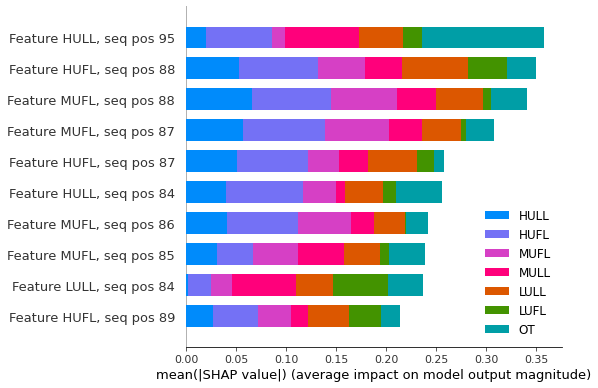

time step 18


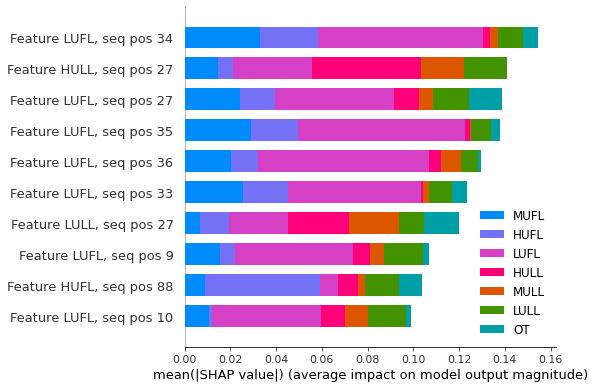

time step 34


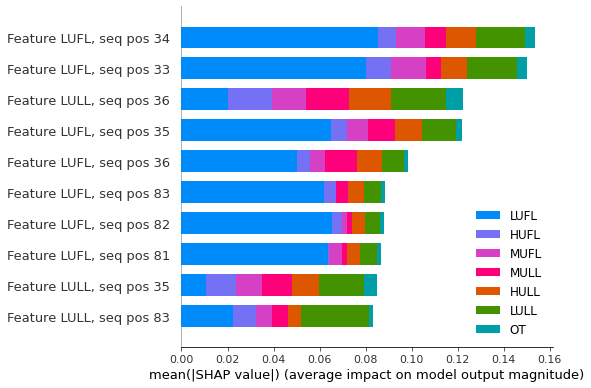

time step 35


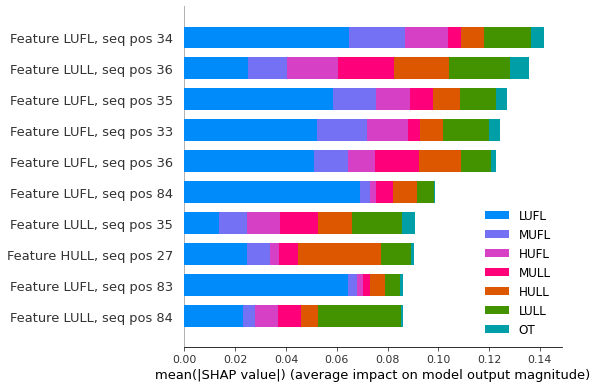

In [40]:
%matplotlib inline

for ind in [0, 18, 34, 35]:
    print("time step {}".format(ind))
    shap.summary_plot(reduced_deep_shap_values[ind], reduced_new_input, feature_names=feature_list, class_names=pred_data.cols[1:][:], max_display=10)

# print("asd")
# shap.summary_plot(reduced_deep_shap_values[0], reduced_new_input, feature_names=feature_list, class_names=pred_data.cols[1:][:], max_display=10)
# print("asdasd")
# shap.summary_plot(reduced_deep_shap_values[95], reduced_new_input, feature_names=feature_list, class_names=pred_data.cols[1:][:], max_display=10)

In [48]:
def ChronoSHAP(shap_values_list, input_seq_len, n_feat, feat_names=None, mode=1, pred_hor=0, out_feat=0, custom_cycler=None, grid=0, save=0, path=None, figsize=(12, 5), normalize=True):
    if feat_names==None:
        feat_names = range(n_feat)
        
    if mode==0:
        print("Output mode")
        fig, axis = plt.subplots(4,2,sharex=True, figsize=figsize) # (7, 9)
        for i in range(len(shap_values_list[pred_hor])):
            signal = shap_values_list[pred_hor][i].reshape((1, input_seq_len, n_feat)).squeeze()
#             print(feat_names[i],signal.shape)
            
            for s in range(signal.shape[1]):
                if i<4:
                    axis[i%4,0].plot(signal[:,s], label = feat_names[s], color=plt.rcParams['axes.prop_cycle'].by_key()['color'][s],linewidth=1.5)
                elif i>=4 and i<8:
                    axis[i%4,1].plot(signal[:,s], label = feat_names[s], color=plt.rcParams['axes.prop_cycle'].by_key()['color'][s],linewidth=1.5)
            if i<4:
                axis[i%4,0].set_title("Output feature: {}".format(feat_names[i]))
#                 axis[i%4,0].legend()
                axis[i%4,0].set_prop_cycle(custom_cycler)
            elif i>=4 and i<=n_feat:
                axis[i%4,1].set_title("Output feature: {}".format(feat_names[i]))
#                 axis[i%4,1].legend()
                axis[i%4,1].set_prop_cycle(custom_cycler)

        # Create a single legend for all subplots
        handles, labels = axis[0,0].get_legend_handles_labels()
        fig.legend(handles, labels, loc='lower center', ncol=n_feat, fontsize='large')
        fig.suptitle("Time step {}".format(pred_hor), fontsize=14)
        fig.tight_layout()
        plt.subplots_adjust(bottom=0.085)
        if 4*2>n_feat:
            axis[3,1].set_axis_off()
    
    elif mode==1:
        print("Input/output mode")
#       prediction horizon, output feature, feature impact (input time step, input feature)
        signals = np.asarray(shap_values_list).squeeze()
        signals = signals.reshape((signals.shape[0], signals.shape[1], input_seq_len, n_feat))
#         print("signals.shape: ",signals.shape)
#         print("\tpred_hor:\t{}\n\tout_feats:\t{}\n\tseq_len:\t{}\n\tinp_feats:\t{}".format(
#             signals.shape[0],signals.shape[1],signals.shape[2],signals.shape[3]))
#         reduction by sum
        accum_signals = np.sum(np.abs(signals), axis=(1,3))
        if normalize:
            for i in range(accum_signals.shape[0]):
                accum_signals[i] = (accum_signals[i]-np.min(accum_signals[i]))/(np.max(accum_signals[i])-np.min(accum_signals[i]))
#         print(feat_names[out_feat],signals[:,out_feat,:].shape)
        
#         print(np.sum(signals, axis=(1,3)).shape)
        
        fig, ax = plt.subplots(figsize=figsize)
        im = ax.imshow(accum_signals, cmap="BuGn")
        cbar = ax.figure.colorbar(im, ax=ax)
        cbar.ax.set_ylabel("Accumulated impact", rotation=-90, va="bottom", fontsize=20, labelpad=12)
        
        ax.axis([-0.5, input_seq_len-0.5, -0.5, len(shap_values_list)-0.5])
        
        print("accum_signals.shape",accum_signals.shape)
        ax.set_xticks(np.arange(accum_signals.shape[1],step=5))
        ax.set_yticks(np.arange(accum_signals.shape[0],step=5))
        
#         labels_above_threshold = [label if label%10==0 else '' for label in 
#                                   np.arange(accum_signals.shape[1])]
#         ax.xaxis.set_ticklabels(labels_above_threshold, minor = False)
        
#         labels_above_threshold = [label if label%10==0 else '' for label in 
#                                   np.arange(accum_signals.shape[0])]
#         ax.yaxis.set_ticklabels(labels_above_threshold, minor = False)
        
        ax.tick_params(right= True, top= True, left= True, bottom= True, 
                       labelright= False, labeltop= False, labelleft= True, labelbottom= True)
#                        labelright= True, labeltop= True, labelleft= True, labelbottom= True)

        ax.set_xlabel("Input sequence time steps", fontsize=20, labelpad=12)
        ax.set_ylabel("Prediction horizon", fontsize=20, labelpad=12)
        plt.tight_layout()

    else:
        print("Mode {} not supported".format(mode))
        
    if grid:
        plt.grid()
        
    if save:
        plt.savefig(path, format="pdf", bbox_inches="tight")

    plt.show()
    return None

Input/output mode
accum_signals.shape (96, 96)


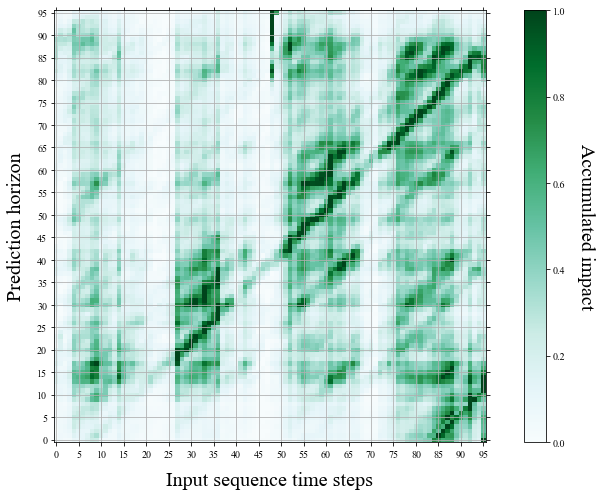

In [49]:
plt.rcParams["font.family"] = "Times New Roman"
%matplotlib inline 

# %matplotlib qt5

# matplotlib.use('Qt5Agg')
custom_cycler = (cycler(color=plt.rcParams['axes.prop_cycle'].by_key()['color'][:8]) + 
                 cycler(linestyle=['dotted', 'dashed', 'dashdot', (0, (3, 5, 1, 5, 1, 5)), 
                                   (5, (10, 3)), (0, (5, 10)), (0, (5, 5)), (0, (5, 1))]))
plt.rc('axes', prop_cycle=custom_cycler)

pred_hor = 0
out_feat = 0
mode = 1
path = "figures"
fig_name = "\\shap_overview_{}_in_{}_out_{}_{}_bg_{}.pdf".format(dataset_key, exp.args.seq_len, exp.args.pred_len, exp.args.model, num_train_samples)
figsize = (11,7)
save = 1

ChronoSHAP(reduced_deep_shap_values, exp.args.seq_len, 
                       exp.args.c_out, pred_data.cols[1:], mode, pred_hor, out_feat, grid=1, save=save, path=path+fig_name, figsize=figsize)




Output mode


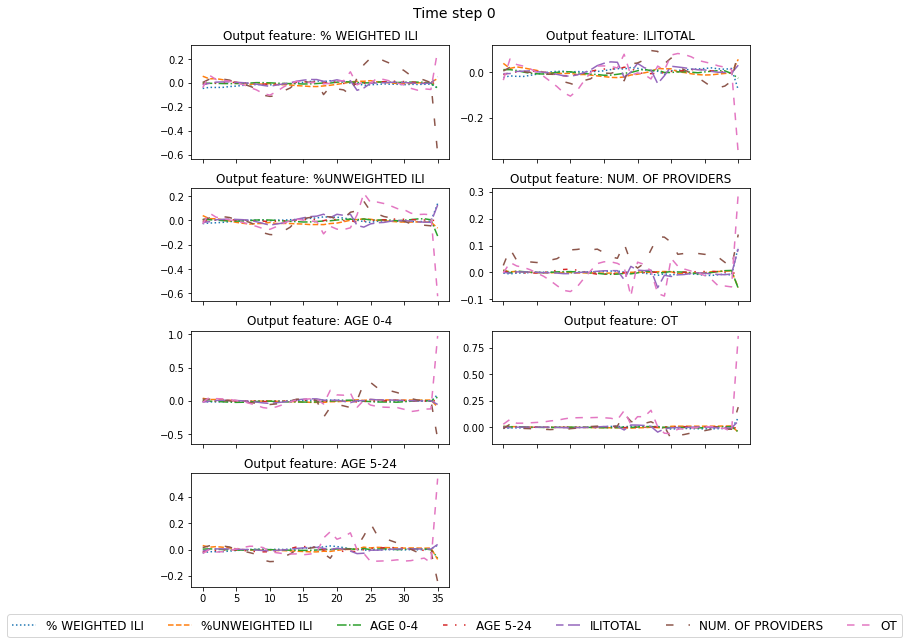

Output mode


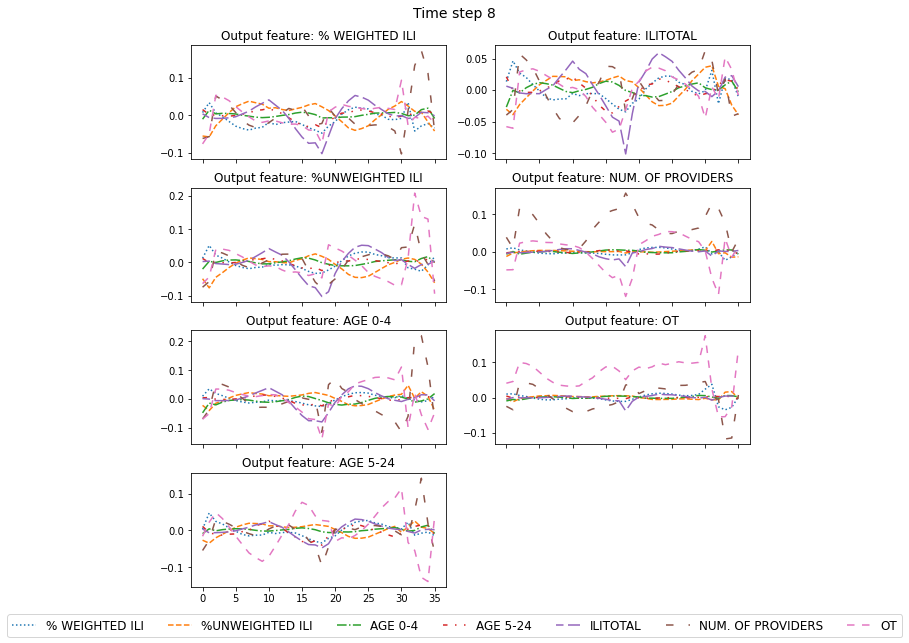

Output mode


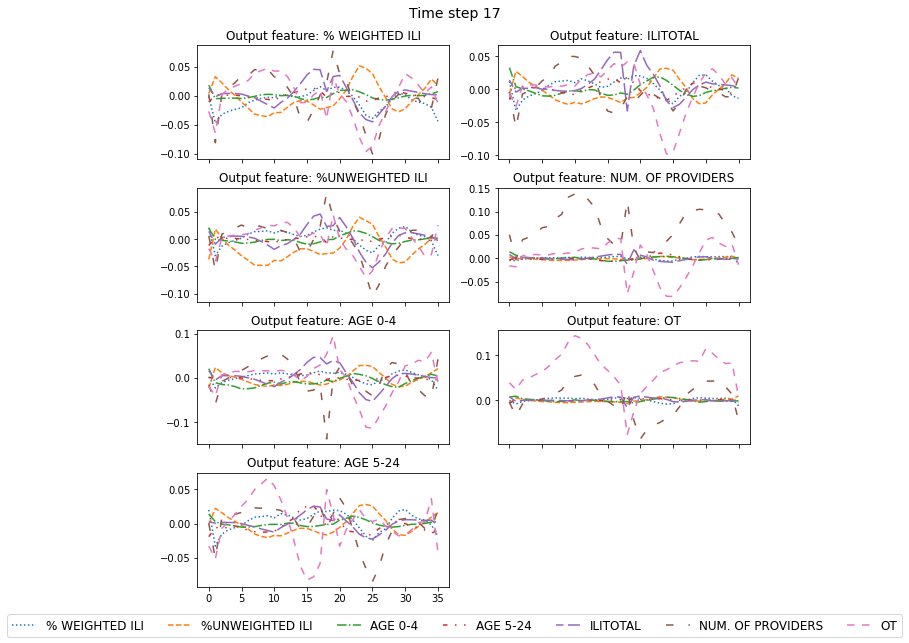

Output mode


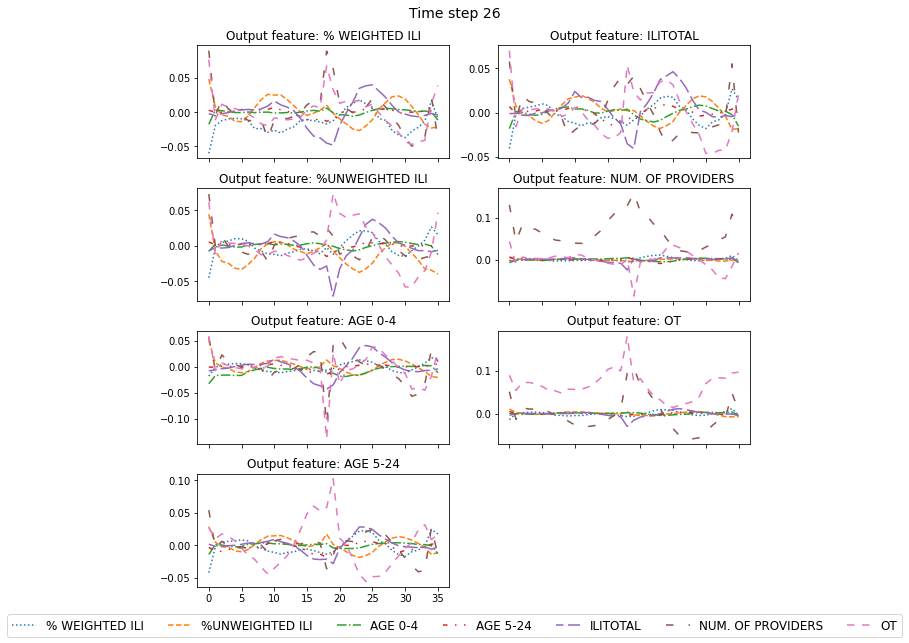

Output mode


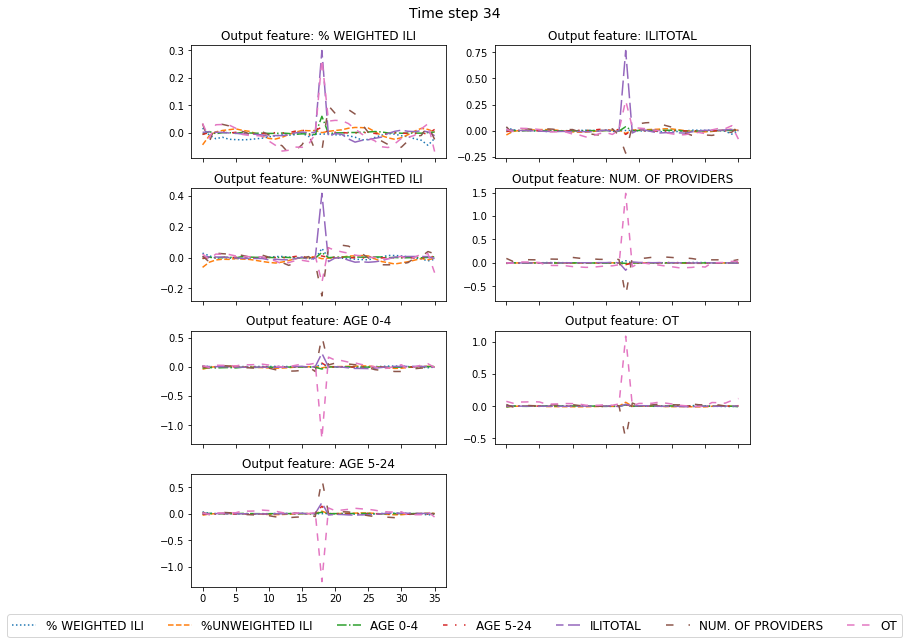

Output mode


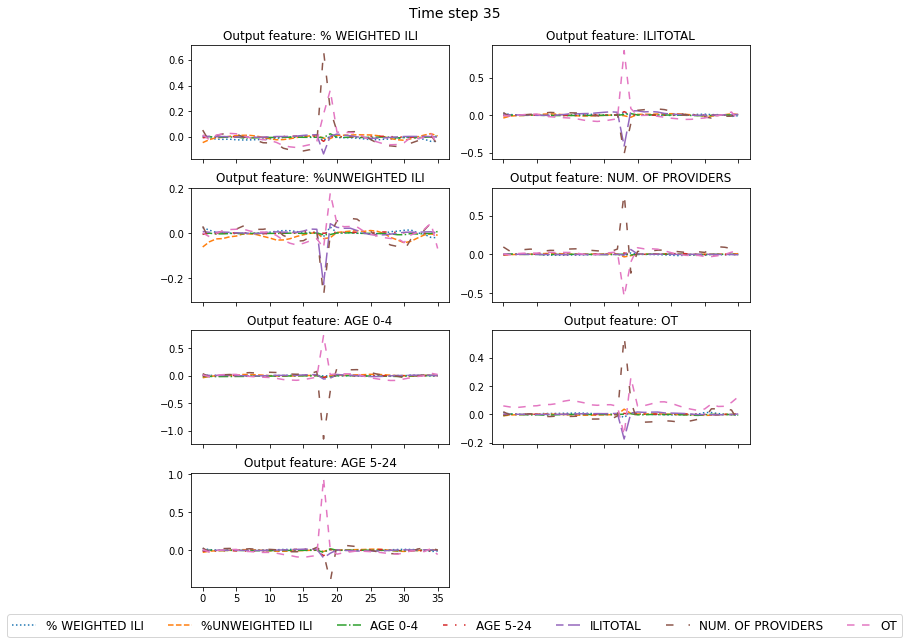

In [13]:
# %matplotlib qt5
%matplotlib inline

custom_cycler = (cycler(color=plt.rcParams['axes.prop_cycle'].by_key()['color'][:8]) + 
                 cycler(linestyle=['dotted', 'dashed', 'dashdot', (0, (3, 5, 1, 5, 1, 5)), 
                                   (5, (10, 3)), (0, (5, 10)), (0, (5, 5)), (0, (5, 1))]))
plt.rc('axes', prop_cycle=custom_cycler)

out_feat = 0
mode = 0
save = 1
path = "figures"
figsize=(8.5, 9)

# for pred_hor in np.linspace(0,95, 6):
for pred_hor in [0, 8, 17, 26, 34, 35]:
# for pred_hor in [0]:
    fig_name = "\\shap_pred_hor_{}_{}_in_{}_out_{}_{}_bg_{}.pdf".format(int(pred_hor), dataset_key, exp.args.seq_len, exp.args.pred_len, exp.args.model, num_train_samples)
    ChronoSHAP(reduced_deep_shap_values, exp.args.seq_len, 
                       exp.args.c_out, pred_data.cols[1:], mode, int(pred_hor), out_feat, custom_cycler, grid=0, save=save, path=path+fig_name, figsize=figsize)


### Remove outliers for better visualization

In [15]:
signals = np.asarray(reduced_deep_shap_values).squeeze()
signals = signals.reshape((signals.shape[0], signals.shape[1], exp.args.seq_len, exp.args.c_out))
# accum_signals = np.sum(np.abs(signals), axis=(1,3))
display(signals.shape)

# display(signals[95,:,48,:])
# print(abs(signals[95,:,48,:]).sum())

# display(signals[0,:,95,:])
# print(abs(signals[0,:,95,:]).sum())

display(signals[35,:,18,:])
print(abs(signals[35,:,18,:]).sum())

display(signals[0,:,35,:])
print(abs(signals[0,:,35,:]).sum())

(36, 7, 36, 7)

array([[-2.66675800e-02, -8.98094848e-03, -4.50287247e-03,
        -3.33790034e-02, -1.31578803e-01,  6.73116922e-01,
         1.77425861e-01],
       [-1.51489358e-02, -2.36699581e-02, -6.43087272e-03,
         2.61120411e-04, -2.26959169e-01, -2.79778242e-01,
        -6.52897507e-02],
       [-5.56167262e-03, -3.58606130e-02, -2.59969402e-02,
        -3.28939185e-02, -6.13139197e-02, -1.15139437e+00,
         7.27038383e-01],
       [-1.74837653e-02, -1.43568916e-02, -2.47856695e-02,
        -7.03151450e-02, -9.77265909e-02, -3.41003016e-02,
         9.47526395e-01],
       [ 3.59298177e-02, -7.61110242e-03,  8.26706272e-03,
         4.75686342e-02, -4.12173629e-01, -5.18013000e-01,
         8.63952875e-01],
       [-1.82914715e-02, -3.25476490e-02,  3.29114334e-03,
         1.72359776e-02, -1.04787322e-02,  7.88364351e-01,
        -5.42550802e-01],
       [-2.19358560e-02,  3.73375788e-02,  2.03707651e-03,
         7.21959770e-03, -1.74430862e-01,  5.58783710e-01,
        -1.4646576

9.174031306436518


array([[-4.27071899e-02,  3.67628038e-02, -4.29506302e-02,
         6.36424311e-03,  5.21643348e-02, -5.90750158e-01,
         2.71265388e-01],
       [ 1.38541654e-01, -6.32699132e-02, -1.28006518e-01,
         2.62628472e-03,  1.26705587e-01, -1.16634555e-01,
        -6.22286201e-01],
       [ 9.52561796e-02, -9.20144171e-02,  5.69916368e-02,
         5.69762895e-03, -5.28075509e-02, -5.70233345e-01,
         9.77456391e-01],
       [ 3.37764472e-02, -7.49284253e-02, -6.21432066e-02,
        -1.37933837e-02,  3.89108062e-02, -2.43848503e-01,
         5.40384769e-01],
       [-7.71115944e-02,  5.72903603e-02, -2.63395347e-02,
        -4.99472814e-03,  3.13201696e-02,  9.19250324e-02,
        -3.58481497e-01],
       [ 9.43829715e-02, -5.62501363e-02, -5.88494465e-02,
         3.67811590e-04,  8.81222188e-02,  1.41272008e-01,
         2.94927716e-01],
       [ 8.79487917e-02, -4.66558523e-02, -4.30566929e-02,
        -6.33413810e-03,  5.78060001e-02,  1.89864576e-01,
         8.6120921

7.773788639751729


In [15]:
with open("Explanations/SHAP/shap_values_{}_in_{}_out_{}_{}_bg_{}.pkl".format(dataset_key, exp.args.seq_len, exp.args.pred_len, exp.args.model, num_train_samples), 'rb') as file:
    filtered_reduced_deep_shap_values = pickle.load(file)
    
# anom = 95
anom = 35

print("Anomaly 1")
for i in range(len(filtered_reduced_deep_shap_values[anom])):
#     print(filtered_reduced_deep_shap_values[anom][i][:,48*exp.args.c_out:49*exp.args.c_out].shape)
#     print(np.mean([filtered_reduced_deep_shap_values[anom][i][:,47*exp.args.c_out:48*exp.args.c_out], 
#                    filtered_reduced_deep_shap_values[anom][i][:,49*exp.args.c_out:50*exp.args.c_out], 
#                    filtered_reduced_deep_shap_values[anom-1][i][:,48*exp.args.c_out:49*exp.args.c_out]], axis=0).shape)
    
#     filtered_reduced_deep_shap_values[anom][i][:,48*exp.args.c_out:49*exp.args.c_out] = np.mean([filtered_reduced_deep_shap_values[anom][i][:,47*exp.args.c_out:48*exp.args.c_out], 
#                                                                        filtered_reduced_deep_shap_values[anom][i][:,49*exp.args.c_out:50*exp.args.c_out], 
#                                                                        filtered_reduced_deep_shap_values[anom-1][i][:,48*exp.args.c_out:49*exp.args.c_out]], 
#                                                                       axis=0)
filtered_reduced_deep_shap_values[anom][i][:,18*exp.args.c_out:19*exp.args.c_out] = np.mean([filtered_reduced_deep_shap_values[anom][i][:,17*exp.args.c_out:18*exp.args.c_out], 
                                                                       filtered_reduced_deep_shap_values[anom][i][:,19*exp.args.c_out:20*exp.args.c_out], 
                                                                       filtered_reduced_deep_shap_values[anom-1][i][:,18*exp.args.c_out:19*exp.args.c_out]], 
                                                                      axis=0)

# anom = 0
anom = 0
print("Anomaly 2")
for i in range(len(filtered_reduced_deep_shap_values[anom])):
#     print(filtered_reduced_deep_shap_values[anom][i].shape)
#     i[:,95*exp.args.c_out:96*exp.args.c_out] = np.mean([i[:,95*exp.args.c_out:96*exp.args.c_out],i[:,95*exp.args.c_out:96*exp.args.c_out]], axis=0)
    
#     filtered_reduced_deep_shap_values[anom][i][:,95*exp.args.c_out:96*exp.args.c_out] = np.mean([filtered_reduced_deep_shap_values[anom][i][:,94*exp.args.c_out:95*exp.args.c_out], 
#                                                                        filtered_reduced_deep_shap_values[anom+1][i][:,95*exp.args.c_out:96*exp.args.c_out]], 
#                                                                       axis=0)
filtered_reduced_deep_shap_values[anom][i][:,35*exp.args.c_out:36*exp.args.c_out] = np.mean([filtered_reduced_deep_shap_values[anom][i][:,34*exp.args.c_out:35*exp.args.c_out], 
                                                                       filtered_reduced_deep_shap_values[anom+1][i][:,35*exp.args.c_out:36*exp.args.c_out]], 
                                                                      axis=0)

Anomaly 1
Anomaly 2


In [16]:
signals = np.asarray(filtered_reduced_deep_shap_values).squeeze()
signals = signals.reshape((signals.shape[0], signals.shape[1], exp.args.seq_len, exp.args.c_out))
# accum_signals = np.sum(np.abs(signals), axis=(1,3))
display(signals.shape)

display(signals[95,:,48,:])
print(abs(signals[95,:,48,:]).sum())

display(signals[0,:,95,:])
print(abs(signals[0,:,95,:]).sum())

(96, 7, 96, 7)

array([[-0.00310719,  0.01453573, -0.01602394,  0.01185142, -0.01078835,
         0.01138027,  0.01323051],
       [ 0.00675121,  0.00310507, -0.00014317,  0.00936839, -0.00215365,
         0.00542094,  0.00833442],
       [-0.00018771,  0.02115536, -0.01778922, -0.00538118, -0.00047901,
         0.02270826,  0.02882701],
       [-0.00304353, -0.00453157, -0.02350086,  0.00309159, -0.00491523,
        -0.01265977,  0.00183639],
       [ 0.00434785,  0.02397517, -0.02184203, -0.00787558,  0.00391699,
         0.0032209 , -0.0248414 ],
       [ 0.0177407 ,  0.00659491, -0.0044844 , -0.01827217,  0.00640417,
         0.0161633 , -0.01777648],
       [ 0.01219983, -0.00672851, -0.00673672, -0.00720341,  0.0005414 ,
        -0.00758592, -0.02441377]])

0.5091665480934655


array([[ 8.89973249e-04, -6.41654758e-03,  1.02421525e-02,
        -1.50774065e-02, -1.17198939e-02, -4.82579111e-03,
         1.71672687e-03],
       [ 8.78755504e-03, -4.32041389e-03, -6.46425223e-03,
         1.44881566e-02,  4.83182957e-04,  4.34057153e-03,
         1.24370075e-02],
       [-5.00501296e-03, -5.35780721e-03,  1.33789881e-02,
        -1.03789949e-02, -1.24691410e-02,  1.79216173e-03,
         7.32007902e-06],
       [ 9.49910612e-03,  8.01487127e-03, -5.91418560e-03,
         6.95338822e-03,  2.89767218e-03,  1.36837829e-04,
        -1.16653711e-03],
       [ 5.99207199e-03, -3.32400572e-03, -8.08026671e-04,
        -4.10180842e-03,  4.24154545e-03,  1.18932175e-02,
        -5.32238363e-03],
       [-1.28504276e-02,  2.42965808e-03,  8.51106585e-03,
        -9.62255662e-03, -6.16015983e-04,  4.55457810e-03,
         2.65043107e-03],
       [ 3.40975879e-03, -1.73620745e-02, -5.81532647e-03,
         9.64902202e-03, -6.29787112e-03,  1.07676301e-02,
        -2.1420466

0.31754317815284594


Input/output mode
accum_signals.shape (96, 96)


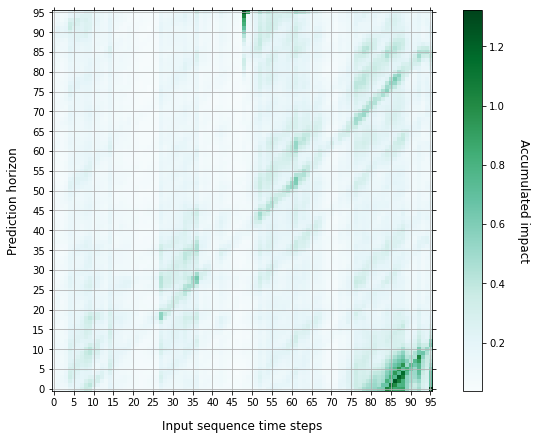

Input/output mode
accum_signals.shape (96, 96)


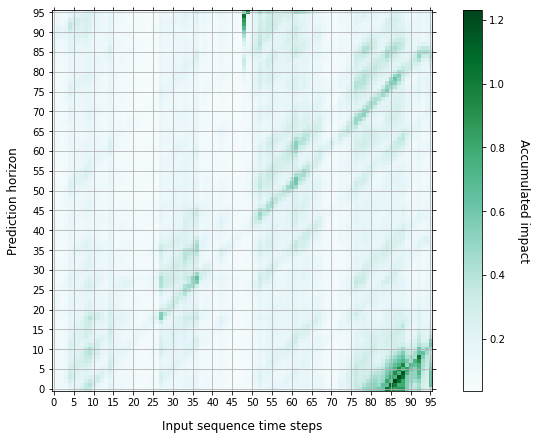

In [17]:
%matplotlib inline 
# %matplotlib qt5

# matplotlib.use('Qt5Agg')
custom_cycler = (cycler(color=plt.rcParams['axes.prop_cycle'].by_key()['color'][:8]) + 
                 cycler(linestyle=['dotted', 'dashed', 'dashdot', (0, (3, 5, 1, 5, 1, 5)), 
                                   (5, (10, 3)), (0, (5, 10)), (0, (5, 5)), (0, (5, 1))]))
plt.rc('axes', prop_cycle=custom_cycler)

pred_hor = 0
out_feat = 0
mode = 1
save = 0
path = "figures"
fig_name = "\\shap_overview_{}_in_{}_out_{}_{}_bg_{}.pdf".format(dataset_key, exp.args.seq_len, exp.args.pred_len, exp.args.model, num_train_samples)
figsize = (11,7)

ChronoSHAP(reduced_deep_shap_values, exp.args.seq_len, 
                       exp.args.c_out, pred_data.cols[1:], mode, pred_hor, out_feat, grid=1, save=save, path=path+fig_name, figsize=figsize)


path = "figures"
fig_name = "\\shap_overview_{}_in_{}_out_{}_{}_bg_{}_no_outliers.pdf".format(dataset_key, exp.args.seq_len, exp.args.pred_len, exp.args.model, num_train_samples)
figsize = (11,7)

ChronoSHAP(filtered_reduced_deep_shap_values, exp.args.seq_len, 
                       exp.args.c_out, pred_data.cols[1:], mode, pred_hor, out_feat, grid=1, save=save, path=path+fig_name, figsize=figsize)



In [25]:
model(batch_x, batch_x_mark, dec_inp, batch_y_mark)

tensor([[[ 6.1507e-01, -1.2287e+00, -7.2011e-02,  8.7379e-01,  7.4863e-02,
          -7.1749e-01,  1.1203e+00,  1.1451e+00],
         [ 6.0026e-01, -1.3929e+00,  1.8149e-02,  7.7930e-01,  1.0900e-01,
          -6.1561e-01,  7.2854e-01,  9.7183e-01],
         [ 5.8116e-01, -1.3461e+00,  9.0808e-03,  7.5828e-01,  1.1202e-01,
          -6.1982e-01,  6.9711e-01,  9.4458e-01],
         [ 5.8789e-01, -1.2466e+00,  2.0215e-02,  7.1803e-01,  1.3135e-01,
          -6.2930e-01,  6.8488e-01,  9.5404e-01],
         [ 6.1863e-01, -1.1455e+00,  2.2719e-02,  6.7707e-01,  1.5055e-01,
          -6.2138e-01,  6.9731e-01,  9.7948e-01],
         [ 6.5272e-01, -1.0895e+00, -2.3657e-03,  6.5557e-01,  1.5585e-01,
          -5.9477e-01,  7.1691e-01,  1.0014e+00],
         [ 6.7905e-01, -1.0819e+00, -3.9206e-02,  6.5549e-01,  1.5068e-01,
          -5.7363e-01,  7.2712e-01,  1.0092e+00],
         [ 6.9971e-01, -1.0940e+00, -6.2686e-02,  6.6170e-01,  1.4845e-01,
          -5.7202e-01,  7.1918e-01,  1.0073e+00],


In [ ]:
pred_data, pred_loader = exp._get_data("pred")

for i, (batch_x, batch_y, batch_x_mark, batch_y_mark) in enumerate(pred_loader):
    print("Shapes of batch_x: {}, batch_x_mark: {}, batch_y: {}, batch_y_mark: {}".format(batch_x.shape, batch_x_mark.shape, batch_y.shape, batch_y_mark.shape))
#     print("batch_x: ",batch_x[0,:,0])
#     print("batch_y: ",batch_y[0,:,0])
    print()

batch_x = batch_x.float().to(next(model.parameters()).device)
aux_batch_x = batch_x.clone().detach()

batch_y = batch_y.float().to(next(model.parameters()).device)
batch_x_mark = batch_x_mark.float().to(next(model.parameters()).device)
batch_y_mark = batch_y_mark.float().to(next(model.parameters()).device)

dec_inp = torch.zeros([batch_y.shape[0], pred_data.pred_len, batch_y.shape[2]]).float().to(batch_y.device)
dec_inp = torch.cat([batch_y[:, :pred_data.label_len, :], dec_inp], dim=1).float().to(next(model.parameters()).device)

print("Model input shapes: batch_x: {}, batch_x_mark: {}, dec_inp: {}, batch_y_mark: {}".format(batch_x.shape, batch_x_mark.shape, dec_inp.shape, batch_y_mark.shape))

In [30]:
aux_batch_x = batch_x.clone().detach()

aux_batch_x[:,:,0] = 0

(model(batch_x, batch_x_mark, dec_inp, batch_y_mark)[:,:,:]-model(aux_batch_x, batch_x_mark, dec_inp, batch_y_mark)[:,:,:]).sum(dim=0)

tensor([[-0.0753, -0.0113, -0.0346,  0.0253, -0.0378, -0.0760, -0.0578, -0.0169],
        [-0.0732, -0.0062, -0.0338,  0.0247, -0.0351, -0.0654, -0.0530, -0.0197],
        [-0.0731, -0.0050, -0.0337,  0.0246, -0.0340, -0.0639, -0.0531, -0.0198],
        [-0.0732, -0.0045, -0.0340,  0.0250, -0.0337, -0.0631, -0.0533, -0.0200],
        [-0.0740, -0.0042, -0.0343,  0.0253, -0.0338, -0.0629, -0.0531, -0.0205],
        [-0.0747, -0.0046, -0.0346,  0.0254, -0.0334, -0.0645, -0.0538, -0.0213],
        [-0.0751, -0.0058, -0.0348,  0.0253, -0.0334, -0.0665, -0.0540, -0.0218],
        [-0.0757, -0.0070, -0.0353,  0.0252, -0.0331, -0.0675, -0.0540, -0.0226],
        [-0.0759, -0.0082, -0.0351,  0.0257, -0.0329, -0.0676, -0.0540, -0.0227],
        [-0.0765, -0.0084, -0.0353,  0.0262, -0.0336, -0.0672, -0.0535, -0.0220],
        [-0.0773, -0.0087, -0.0350,  0.0266, -0.0342, -0.0668, -0.0533, -0.0210],
        [-0.0779, -0.0082, -0.0358,  0.0274, -0.0349, -0.0678, -0.0532, -0.0199],
        [-0.0789